# Purpose
This notebook will use functions from `../plot_calibration.py` to plot calibrations of bnn trained on different datasets, and compare the BNNs' performances against each other when tested on the same test set. The main purposes of this are:

1. To see how BNN perfomance differs as it's trained on different datasets
2. To have a record of BNN performance so that after having programmed the hierarchical inference step, we can see how BNN *with* hierarchical inference performs against BNN *without* hierarchical inference

### setups

In [1]:
# importing functions from plot_calibration.py
import sys
sys.path.insert(1, '../')
import plot_calibration as pc
from IPython.display import Image
import joblib as jl
import numpy as np
from chainconsumer import ChainConsumer

# setups
pc.plot_pretty()
model = pc.get_model()

2022-12-22 09:11:17.654206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 09:11:17.886055: W tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 09:11:17.886070: I tensorflow/tsl/cuda/cudart_stub.cc:28] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-22 09:11:18.793091: W tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libnvinfer.so.8'; dlerror: libnvinfer.so.8: cannot open shared object file: No such file or directory
2022-12-22 09:11:18.793306: W tensorflow/tsl/platform/default/dso_loader.cc:66] 

**`uniform_bnn_h5_path`** is the path that holds the weights of bnn trained on original parameters `{"PA":[0., 180.], "I_sky":22.23, "ell":[0.05, 0.7], "n":[0.5, 1.5], "I_e":[24.3, 25.5], "r_e":[2.5, 6.0]}`. During the generation phase of this dataset, each parameters were sampled from **uniform distribution**.

**`gaussian_bnn_h5_path`** is the path that hold the weights of bnn trained on original parameters also. The difference is, during the generation phase of this dataset, each parameters were sampled from **gaussian distribution**. 

**`out_of_distr_bnn_h5_path`** is the path that hold the weights of bnn trained on out of distribution (distribution wider than original distribution). This distribution has form `{"PA":[0., 180.], "I_sky":20.23, "ell":[0.03, 1.0], "n":[0.2, 1.8], "I_e":[21.3, 28.5], "r_e":[0.0, 9.0]}`. During the generation phase of this dataset, each parameters were sampled from **uniform distribution**

**`_motherpath`**: are path to data (test sets, training sets, ....etc)

In [2]:
original_bnn_h5_path = '../../data_stash/out_data/WC_plot_dataset/uniform_weight.h5'
original_bnn_motherpath = '../../data_stash/out_data/WC_plot_dataset/uniform/'
gaussian_bnn_h5_path = '../../bnn_codes/train_out/gaussian/_BNN_weight.h5'
gaussian_bnn_motherpath = '../../data_stash/out_data/WC_plot_dataset/gaussian/'
out_of_distr_bnn_h5_path = '../bnn_train_out/out_of_distribution/BNN_weight.h5'
out_of_distr_motherpath = '../generated_datasets/{\'PA\': [0.0, 180.0], \'I_sky\': 20.23, \'ell\': [0.03, 1.0], \'n\': [0.2, 1.8], \'I_e\': [21.3, 28.5], \'r_e\': [0.0, 9.0]}/'

In [10]:
def plot_one_chain(sample, y_keep, saved_name: str, num:int):
    # calibration plot of bnn with test set from same distribution as training set
    c = ChainConsumer()
    c.add_chain(sample[num],parameters=["PA", "ell", "n", "I_e", "r_e"], name=saved_name)
    fig = c.plotter.plot(figsize=(8,8), truth=y_keep[num], filename=f"no_inference_plots/one_chain_{saved_name}_{num}")

In [3]:
# def plot_two_chains(target, num:int):
#     if target=='uniform':
#         bnn1 = uniform_samples
#         bnn2 = gaussian_samples_on_uniform
#     elif target=='gaussian':
#         bnn1 = uniform_samples_on_gaussian
#         bnn2 = gaussian_samples
#     #sample_new_single_source = scaler.inverse_transform(np.asarray(bnn1[:,num,:]))
#     #sample_new_single_target = scaler.inverse_transform(np.asarray(bnn2[:,num,:]))
#     c = ChainConsumer()
#     c.add_chain(bnn1[num],parameters=["PA", "ell", "n", "I_e", "r_e"], name='uniform', color='red')
#     c.add_chain(bnn2[num],parameters=["PA", "ell", "n", "I_e", "r_e"], name='gaussian', color='blue')
#     fig = c.plotter.plot(figsize=(8,8), truth=y_keep[num], filename=f"no_inference_plots/two_chains_on_{target}_{num}")

# main
So we have data and trained bnn of: (1) uniform - original (2) gaussian - on original (3) out of distribution.

Now we device scheme to cross-test them to infer bnn's effectiveness

save all output (plots) of above testing into `no_inference_plots/` directory.

# Uniform (original) bnn tested on other test sets

In [ ]:
# original bnn, test on original
inverted_uniform_samples, uniform_y_keep, _ = pc.main(model, original_bnn_h5_path, original_bnn_motherpath)
jl.dump(tuple([inverted_uniform_samples, uniform_y_keep]), 'no_inference_samples/uniform_samples.jl')

In [ ]:
# original bnn, test on gaussian
inverted_uniform_on_gaussian, uniform_on_gaussian_y_keep, _ = pc.main(model, original_bnn_h5_path, gaussian_bnn_motherpath)
jl.dump(tuple([inverted_uniform_on_gaussian, uniform_on_gaussian_y_keep]), 'no_inference_samples/uniform_samples_on_gaussian.jl')

In [5]:
# original bnn, test on out of distribution
inverted_uniform_on_ood, uniform_on_ood_y_keep, _ = pc.main(model, original_bnn_h5_path, out_of_distr_motherpath)
jl.dump(tuple([inverted_uniform_on_ood, uniform_on_ood_y_keep]), 'no_inference_samples/uniform_samples_on_ood.jl')

['no_inference_samples/uniform_samples_on_ood.jl']

In [ ]:
inverted_uniform_samples, uniform_y_keep = jl.load('no_inference_samples/uniform_samples.jl')
inverted_uniform_on_gaussian, uniform_on_gaussian_y_keep = jl.load('no_inference_samples/uniform_samples_on_gaussian.jl')
inverted_uniform_on_ood, uniform_on_ood_y_keep = jl.load('no_inference_samples/uniform_samples_on_ood.jl')

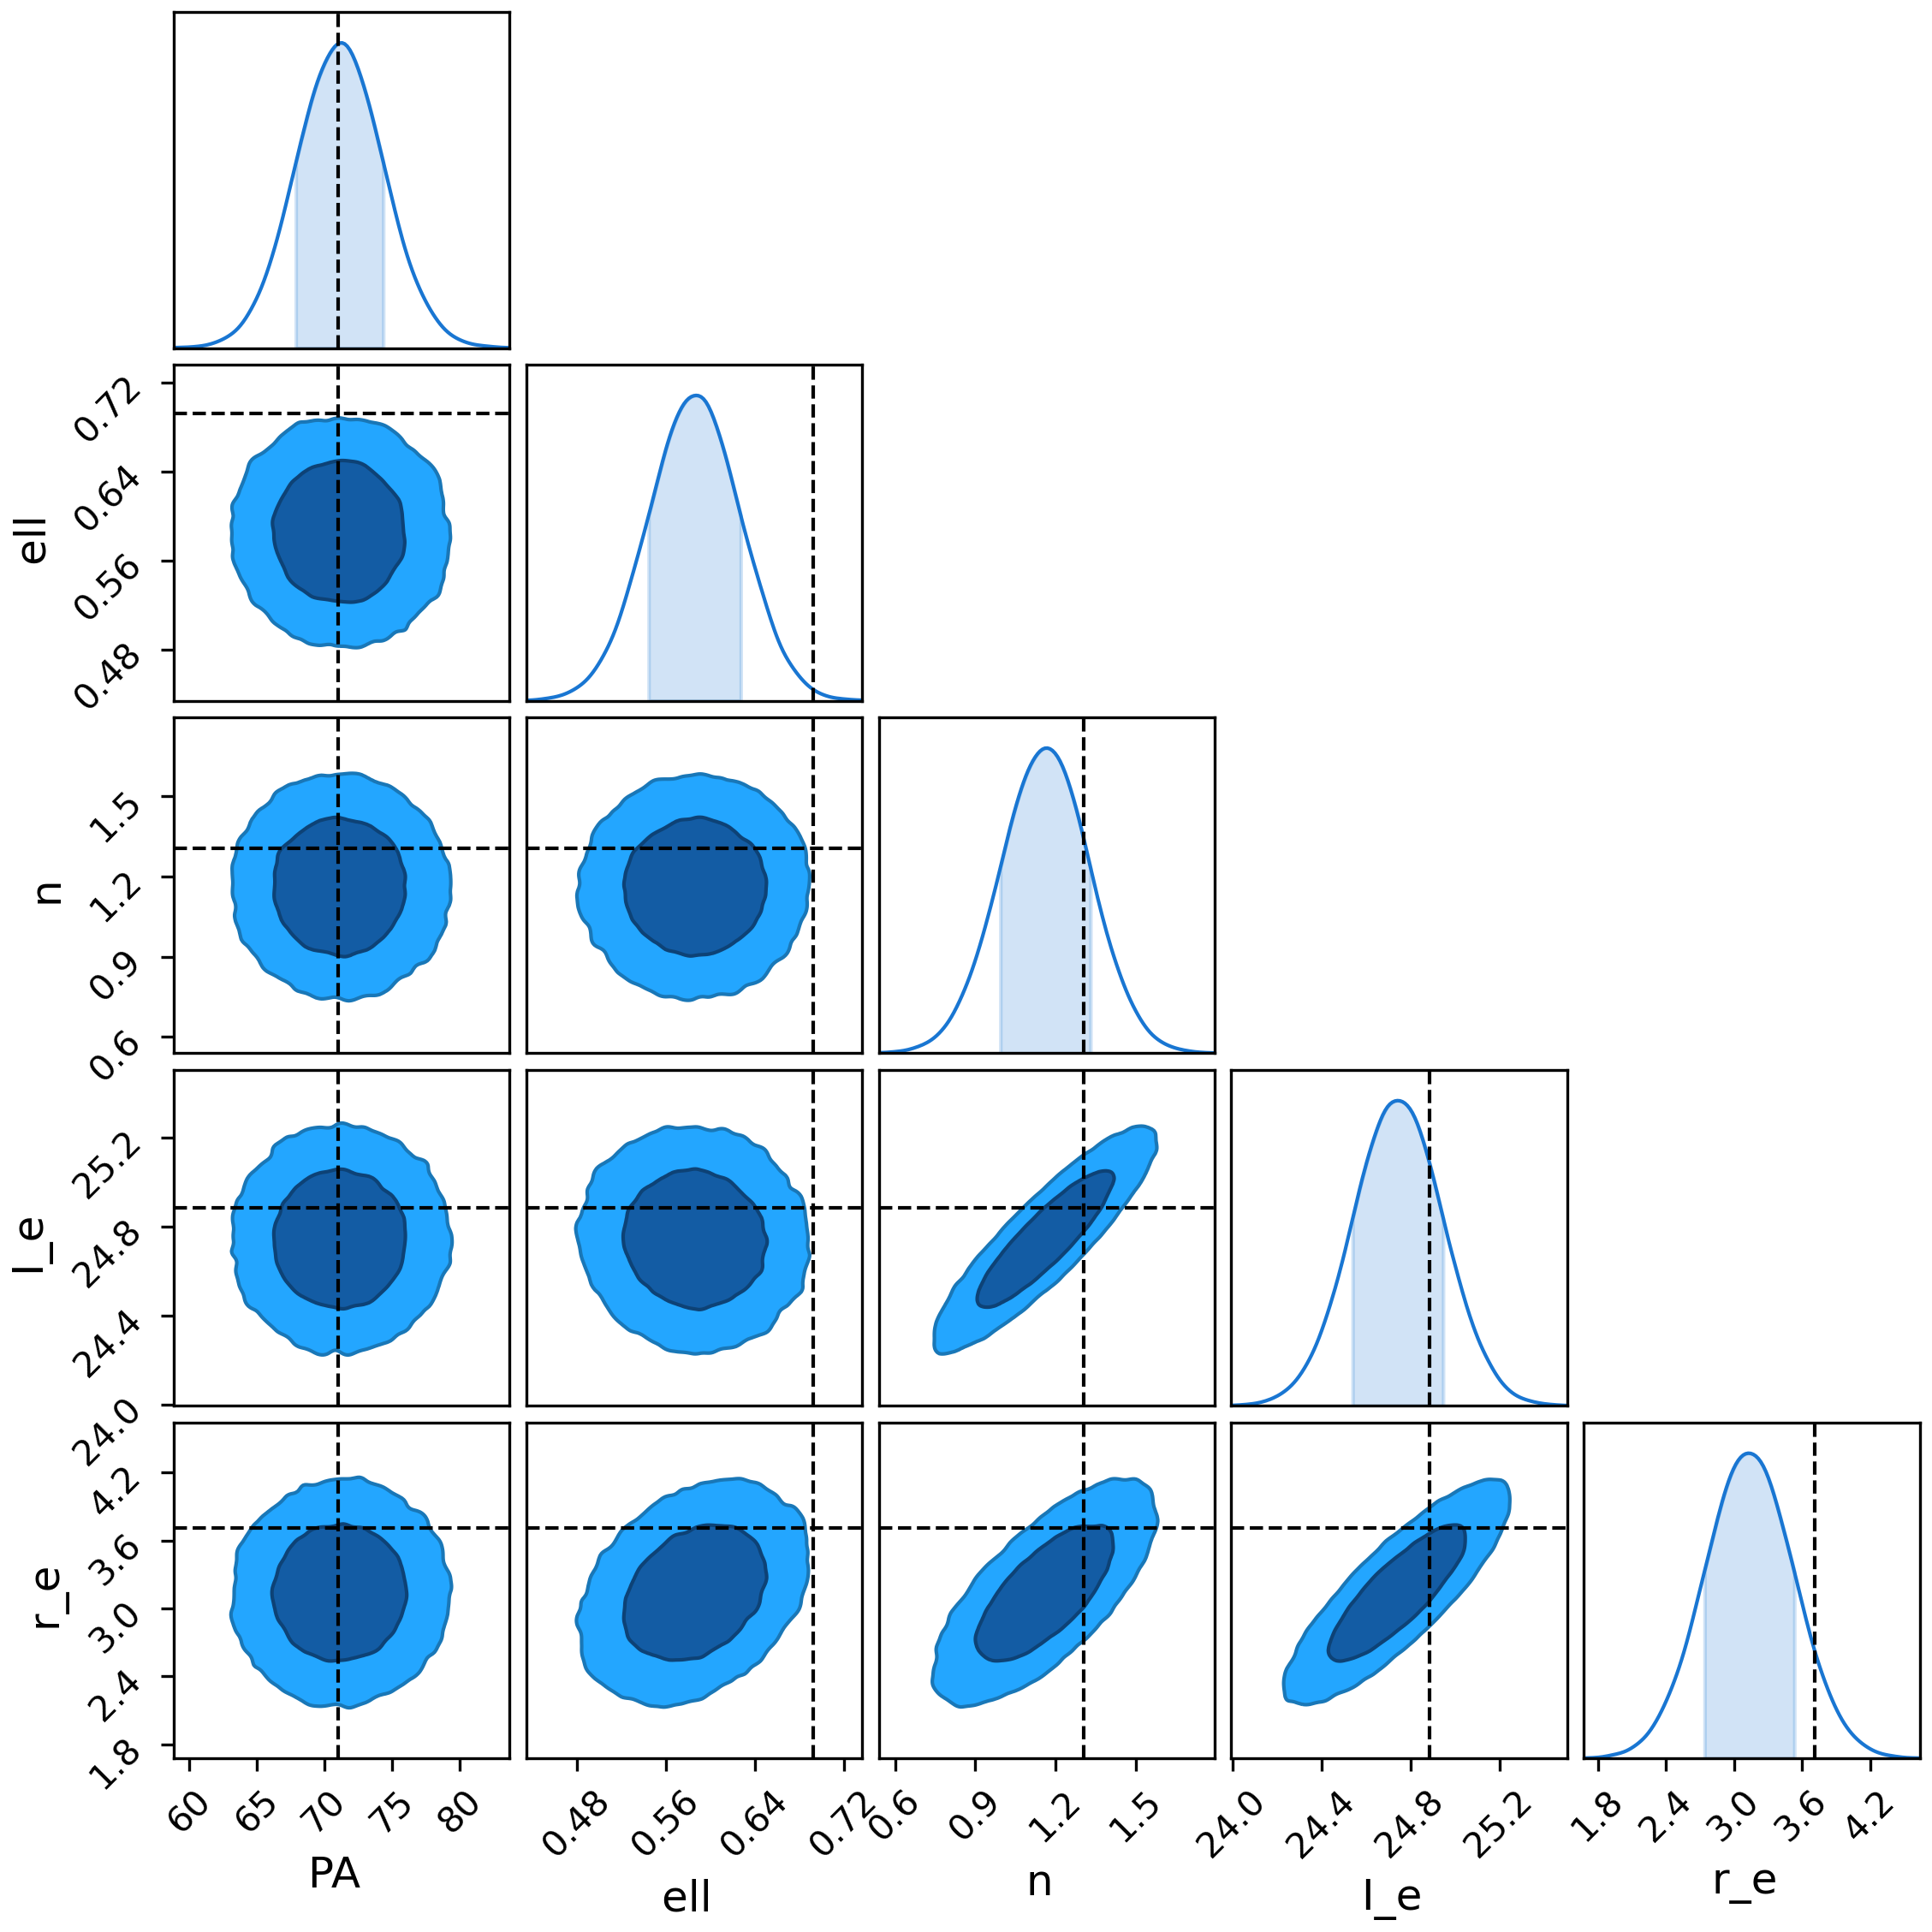

In [6]:
plot_one_chain(inverted_uniform_samples, uniform_y_keep, 'uniform_uniform', 100)
Image(filename='no_inference_plots/one_chain_uniform_uniform_100.png') 

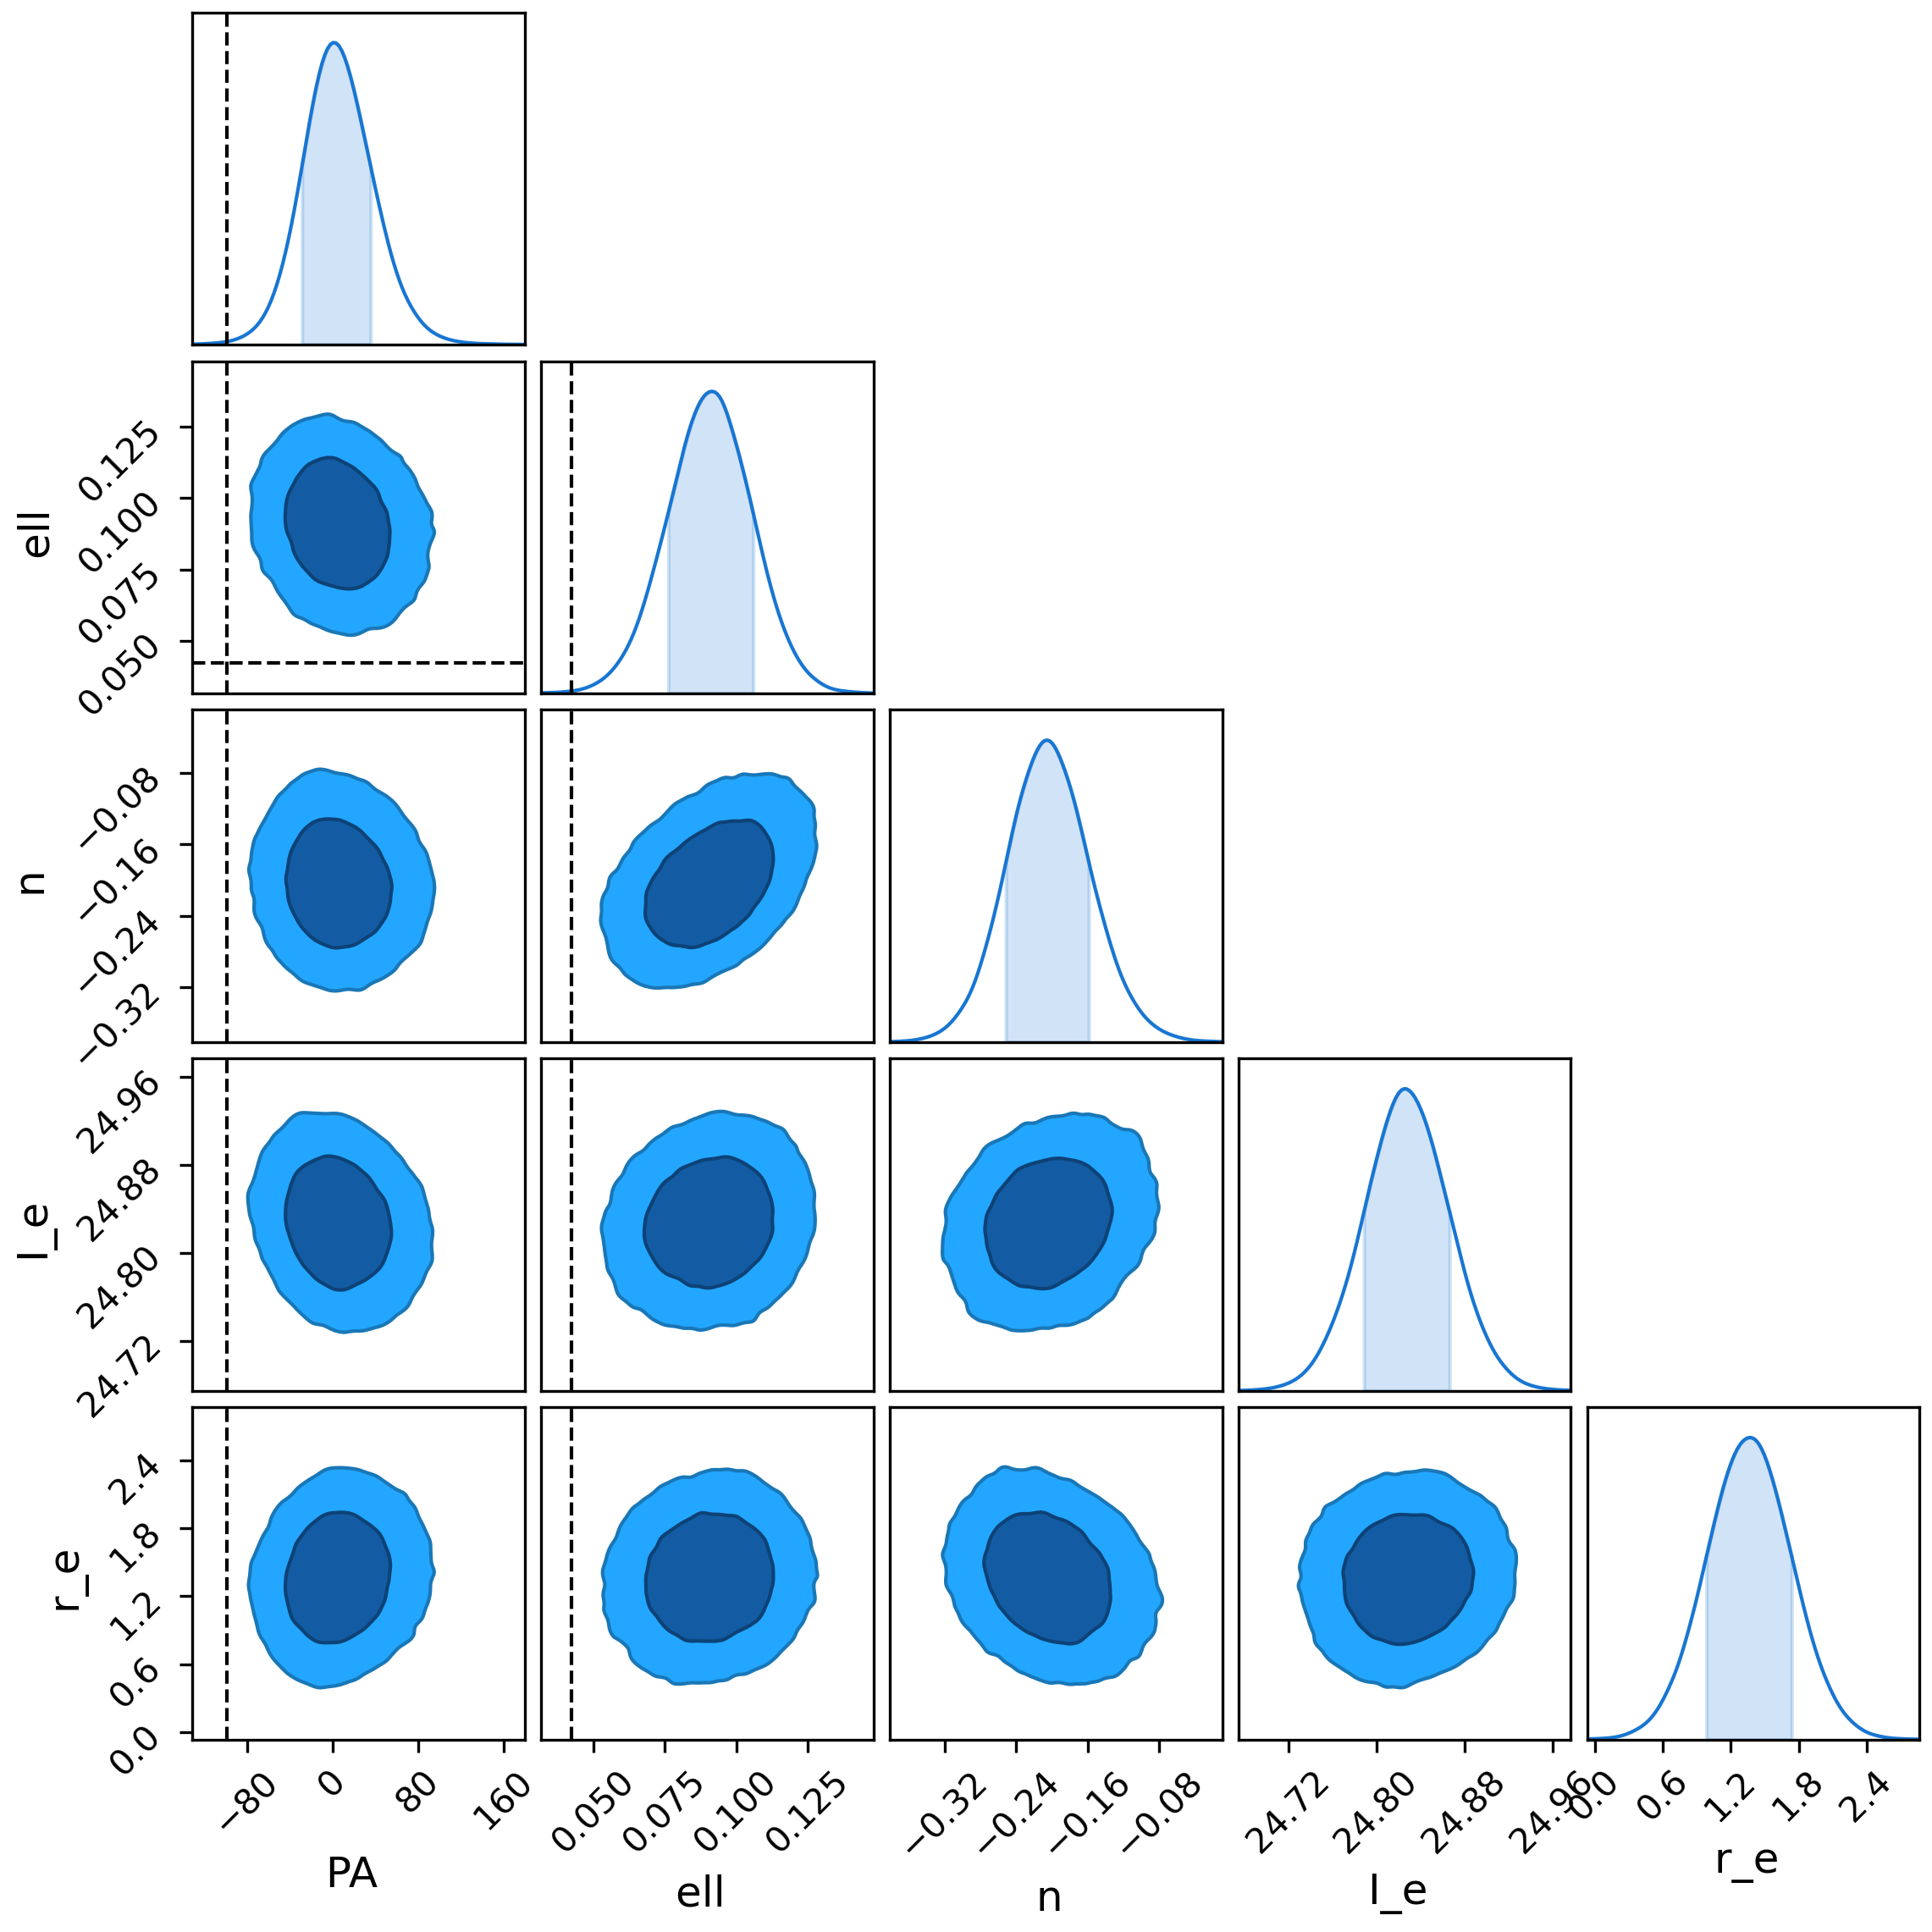

In [10]:
plot_one_chain(inverted_uniform_on_gaussian, uniform_on_gaussian_y_keep, 'uniform_gaussian', 100)
Image(filename='no_inference_plots/one_chain_uniform_gaussian_100.png') 

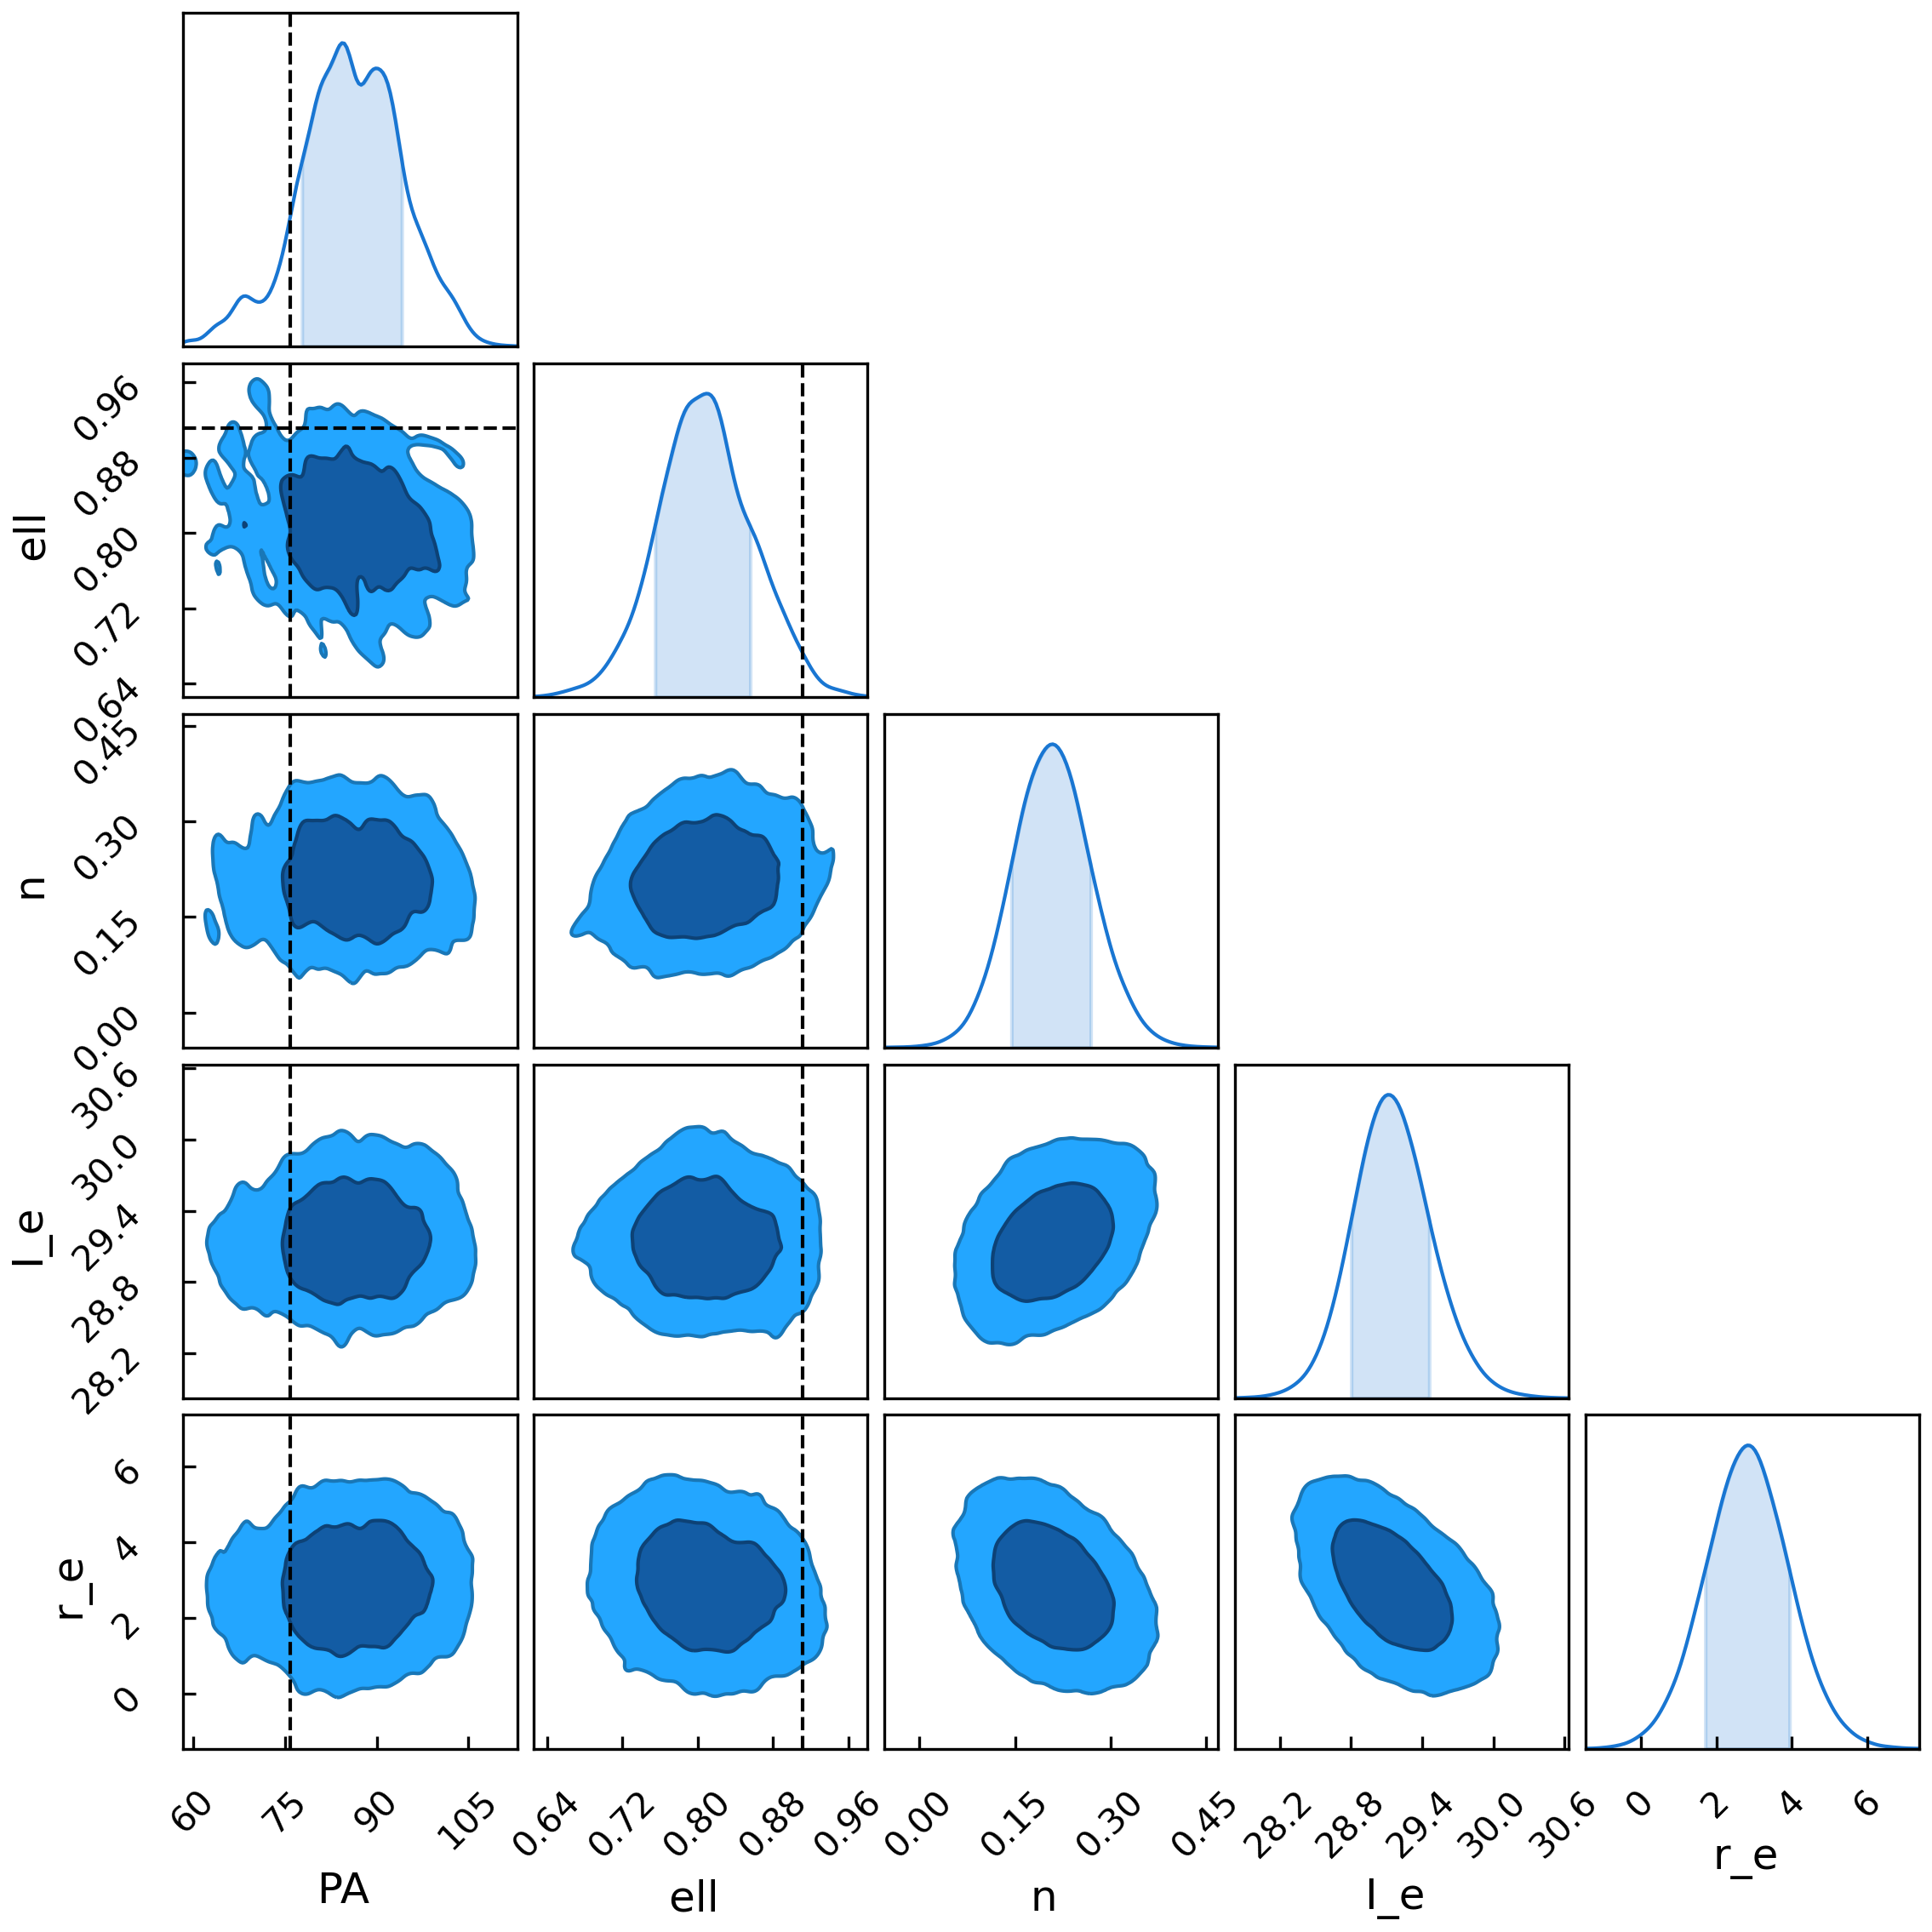

In [7]:
plot_one_chain(inverted_uniform_on_ood, uniform_on_ood_y_keep, 'uniform_ood', 100)
Image(filename='no_inference_plots/one_chain_uniform_ood_100.png') 

# Gaussian bnn test on other test sets


In [5]:
# gaussian bnn, test on gaussian
inverted_gaussian_samples, gaussian_y_keep, _ = pc.main(model, gaussian_bnn_h5_path, gaussian_bnn_motherpath)
jl.dump(tuple([inverted_gaussian_samples, gaussian_y_keep]), 'no_inference_samples/gaussian_samples.jl')

['no_inference_samples/gaussian_samples.jl']

In [3]:
# gaussian bnn, test on original
inverted_gaussian_on_uniform, gaussian_on_uniform_y_keep, _ = pc.main(model, gaussian_bnn_h5_path, original_bnn_motherpath)
jl.dump(tuple([inverted_gaussian_on_uniform, gaussian_on_uniform_y_keep]), 'no_inference_samples/gaussian_samples_on_uniform.jl')

['no_inference_samples/gaussian_samples_on_uniform.jl']

In [ ]:
# gaussian bnn, test on out of distribution
inverted_gaussian_on_ood, gaussian_on_ood_y_keep, _ = pc.main(model, gaussian_bnn_h5_path, out_of_distr_motherpath)
jl.dump(tuple([inverted_gaussian_on_ood_samples, gaussian_on_ood_y_keep]), 'no_inference_samples/gaussian_samples_on_ood.jl')

In [5]:
inverted_gaussian_samples, gaussian_y_keep = jl.load('no_inference_samples/gaussian_samples.jl')
inverted_gaussian_on_uniform, gaussian_on_uniform_y_keep = jl.load('no_inference_samples/gaussian_samples_on_uniform.jl')
inverted_gaussian_on_ood, gaussian_on_ood_y_keep = jl.load('no_inference_samples/gaussian_samples_on_ood.jl')

### as you can see, there are something wrong with the gaussian bnn. Need to re-code and re-train this.

In [8]:
plot_one_chain(inverted_gaussian_samples, gaussian_y_keep, 'gaussian_gaussian', 100)
Image(filename='no_inference_plots/one_chain_gaussian_gaussian_100.png') 

AssertionError: Data for chain Chain 0, parameter PA is being used, but has either NaNs or infs in it!

In [9]:
plot_one_chain(inverted_gaussian_on_uniform, gaussian_on_uniform_y_keep, 'gaussian_uniform', 100)
Image(filename='no_inference_plots/one_chain_gaussian_uniform_100.png') 

AssertionError: Data for chain Chain 0, parameter PA is being used, but has either NaNs or infs in it!

# Out of distribution bnn tests on other test sets

In [6]:
# out of distribution bnn, test on out of distribution 
inverted_ood_samples, ood_y_keep, _ = pc.main(model, out_of_distr_bnn_h5_path, out_of_distr_motherpath)
jl.dump(tuple([inverted_ood_samples, ood_y_keep]), 'no_inference_samples/ood_samples.jl')

['no_inference_samples/ood_samples.jl']

In [5]:
# out of distribution bnn, test on original
inverted_ood_on_original_samples, ood_on_original_y_keep, _ = pc.main(model, out_of_distr_bnn_h5_path, original_bnn_motherpath)
jl.dump(tuple([inverted_ood_on_original_samples, ood_on_original_y_keep]), 'no_inference_samples/ood_on_original_samples.jl')

['no_inference_samples/ood_on_original_samples.jl']

In [5]:
# out of distribution bnn, test on gaussian
inverted_ood_on_gaussian, ood_on_gaussian_y_keep, _ = pc.main(model, out_of_distr_bnn_h5_path, gaussian_bnn_motherpath)
jl.dump(tuple([inverted_ood_on_gaussian, ood_on_gaussian_y_keep]), 'no_inference_samples/ood_samples_on_gaussian.jl')

['no_inference_samples/ood_samples_on_gaussian.jl']

In [8]:
inverted_ood_samples, ood_y_keep = jl.load('no_inference_samples/ood_samples.jl')
inverted_ood_on_original_samples, ood_on_original_y_keep = jl.load('no_inference_samples/ood_on_original_samples.jl')
inverted_ood_on_gaussian, ood_on_gaussian_y_keep = jl.load('no_inference_samples/ood_samples.jl')

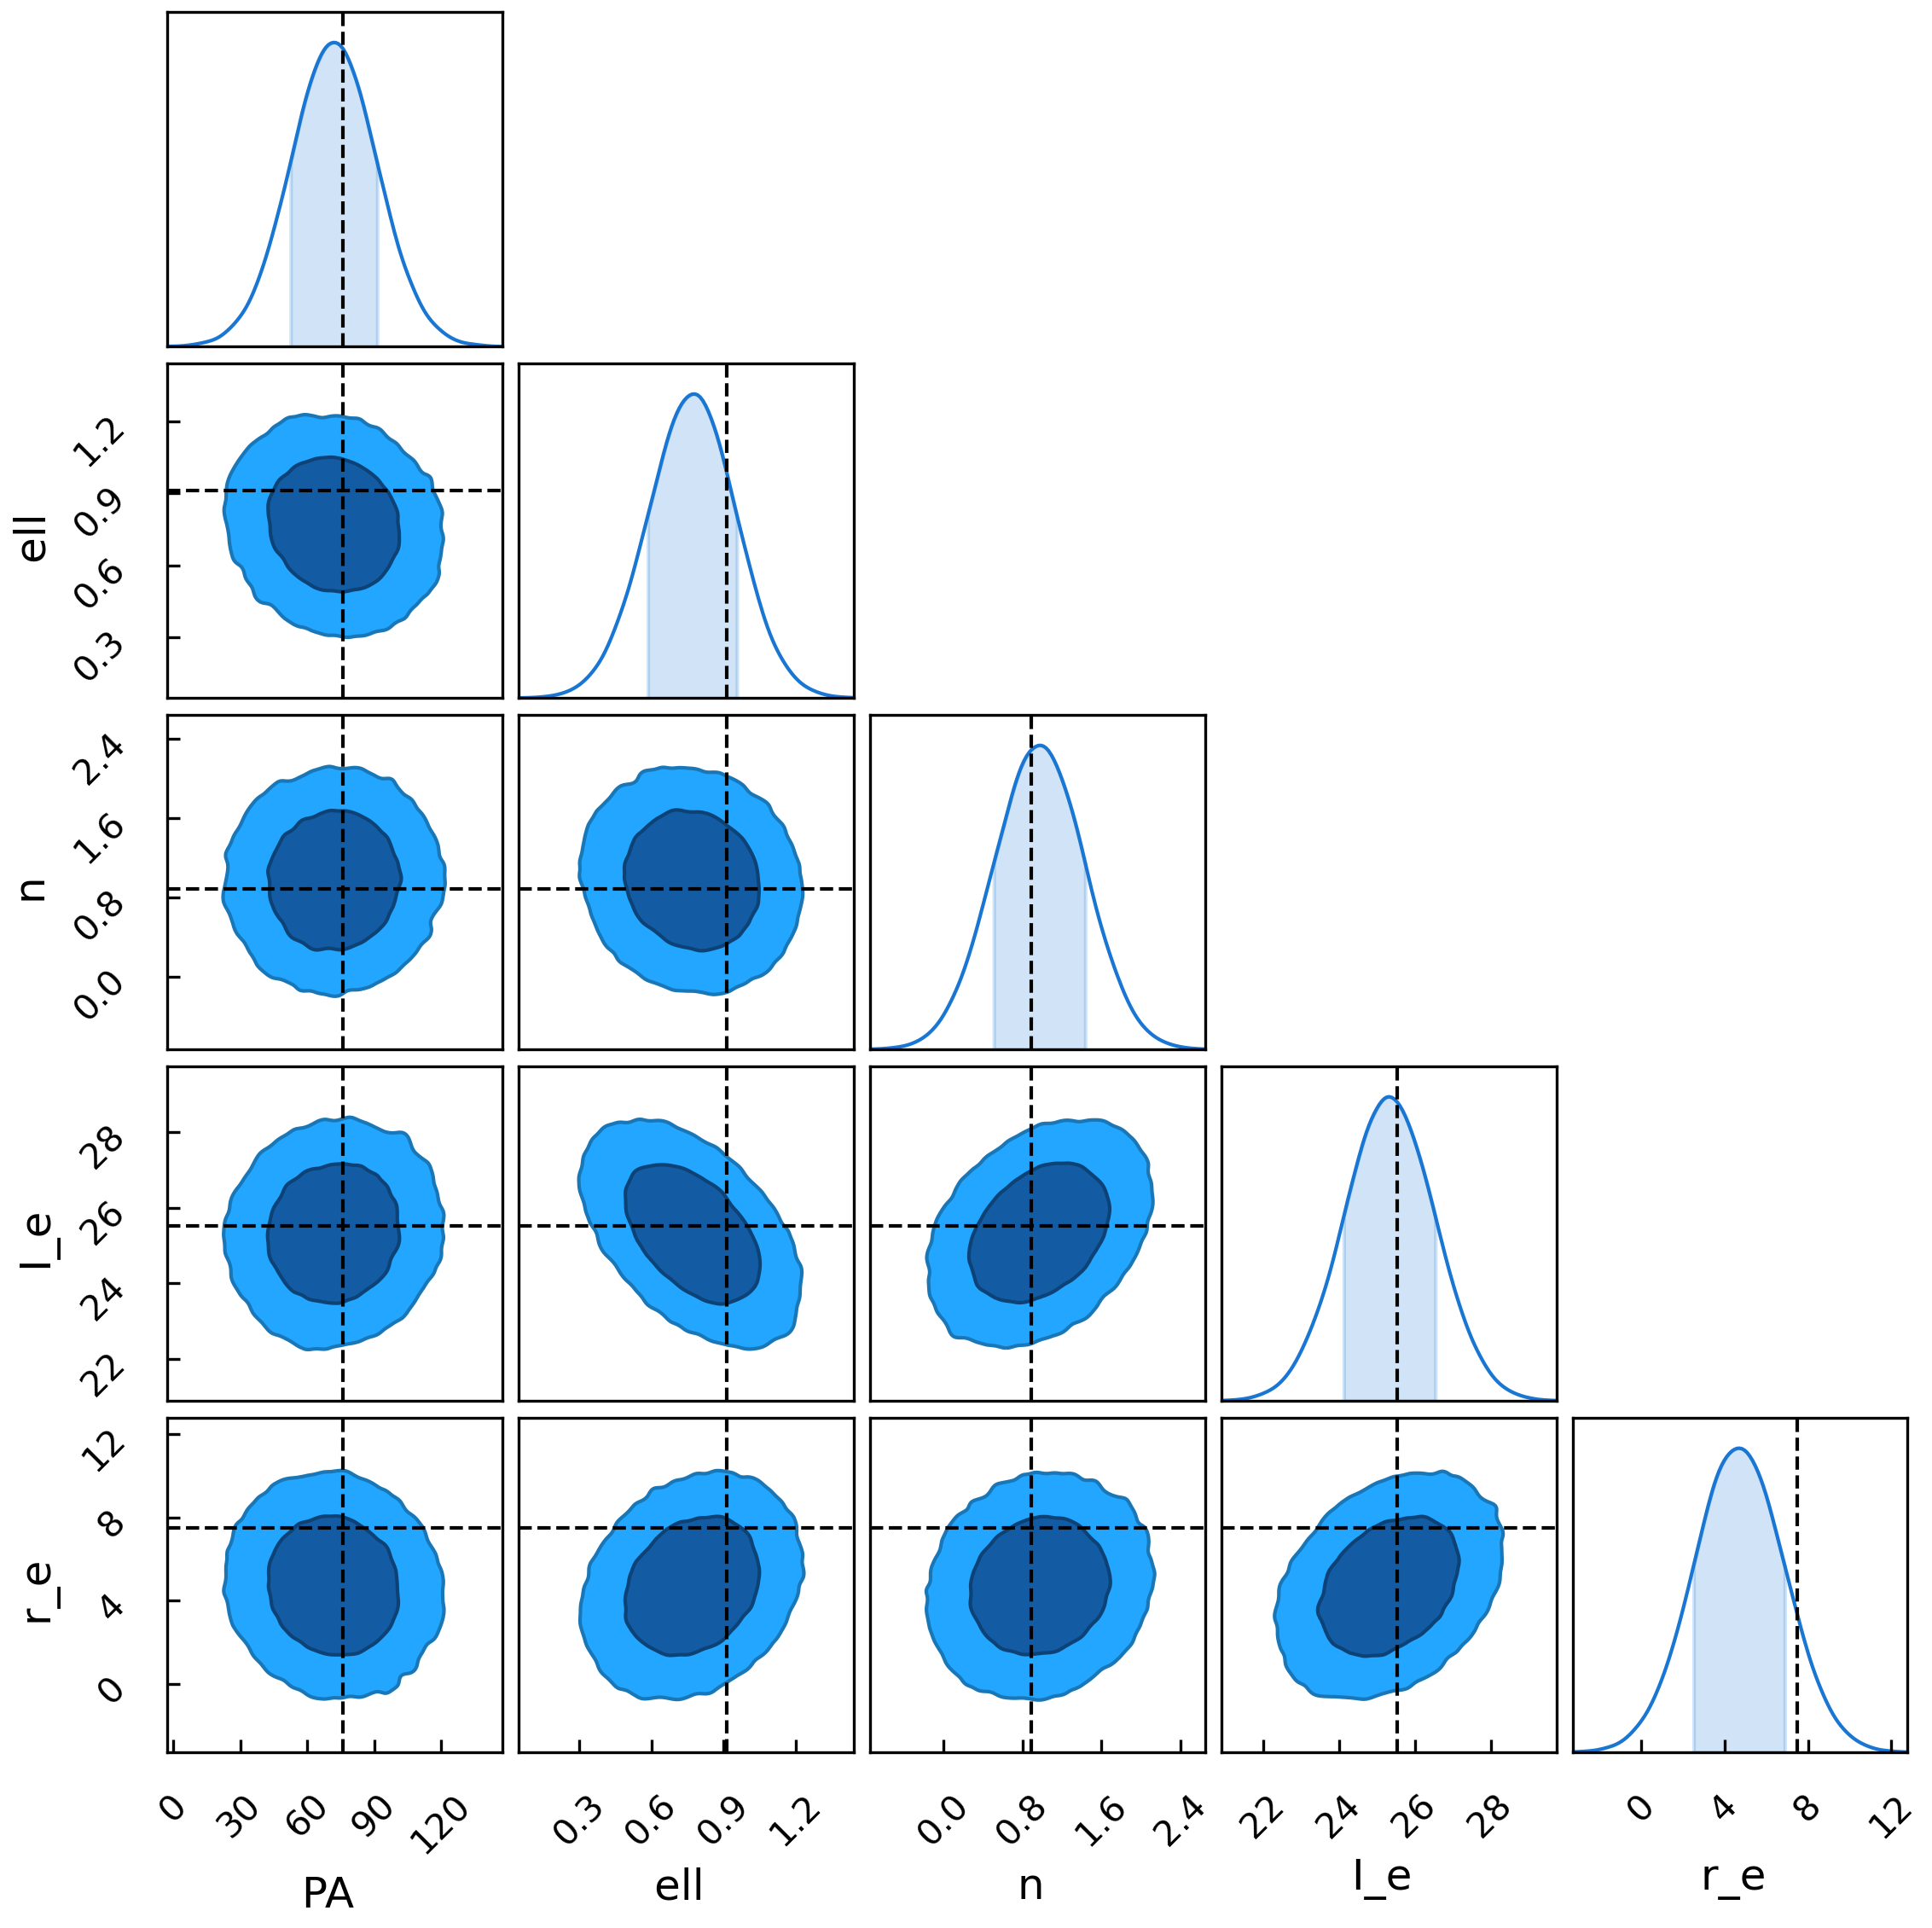

In [12]:
plot_one_chain(inverted_ood_samples, ood_y_keep, 'ood_ood', 100)
Image(filename='no_inference_plots/one_chain_ood_ood_100.png') 

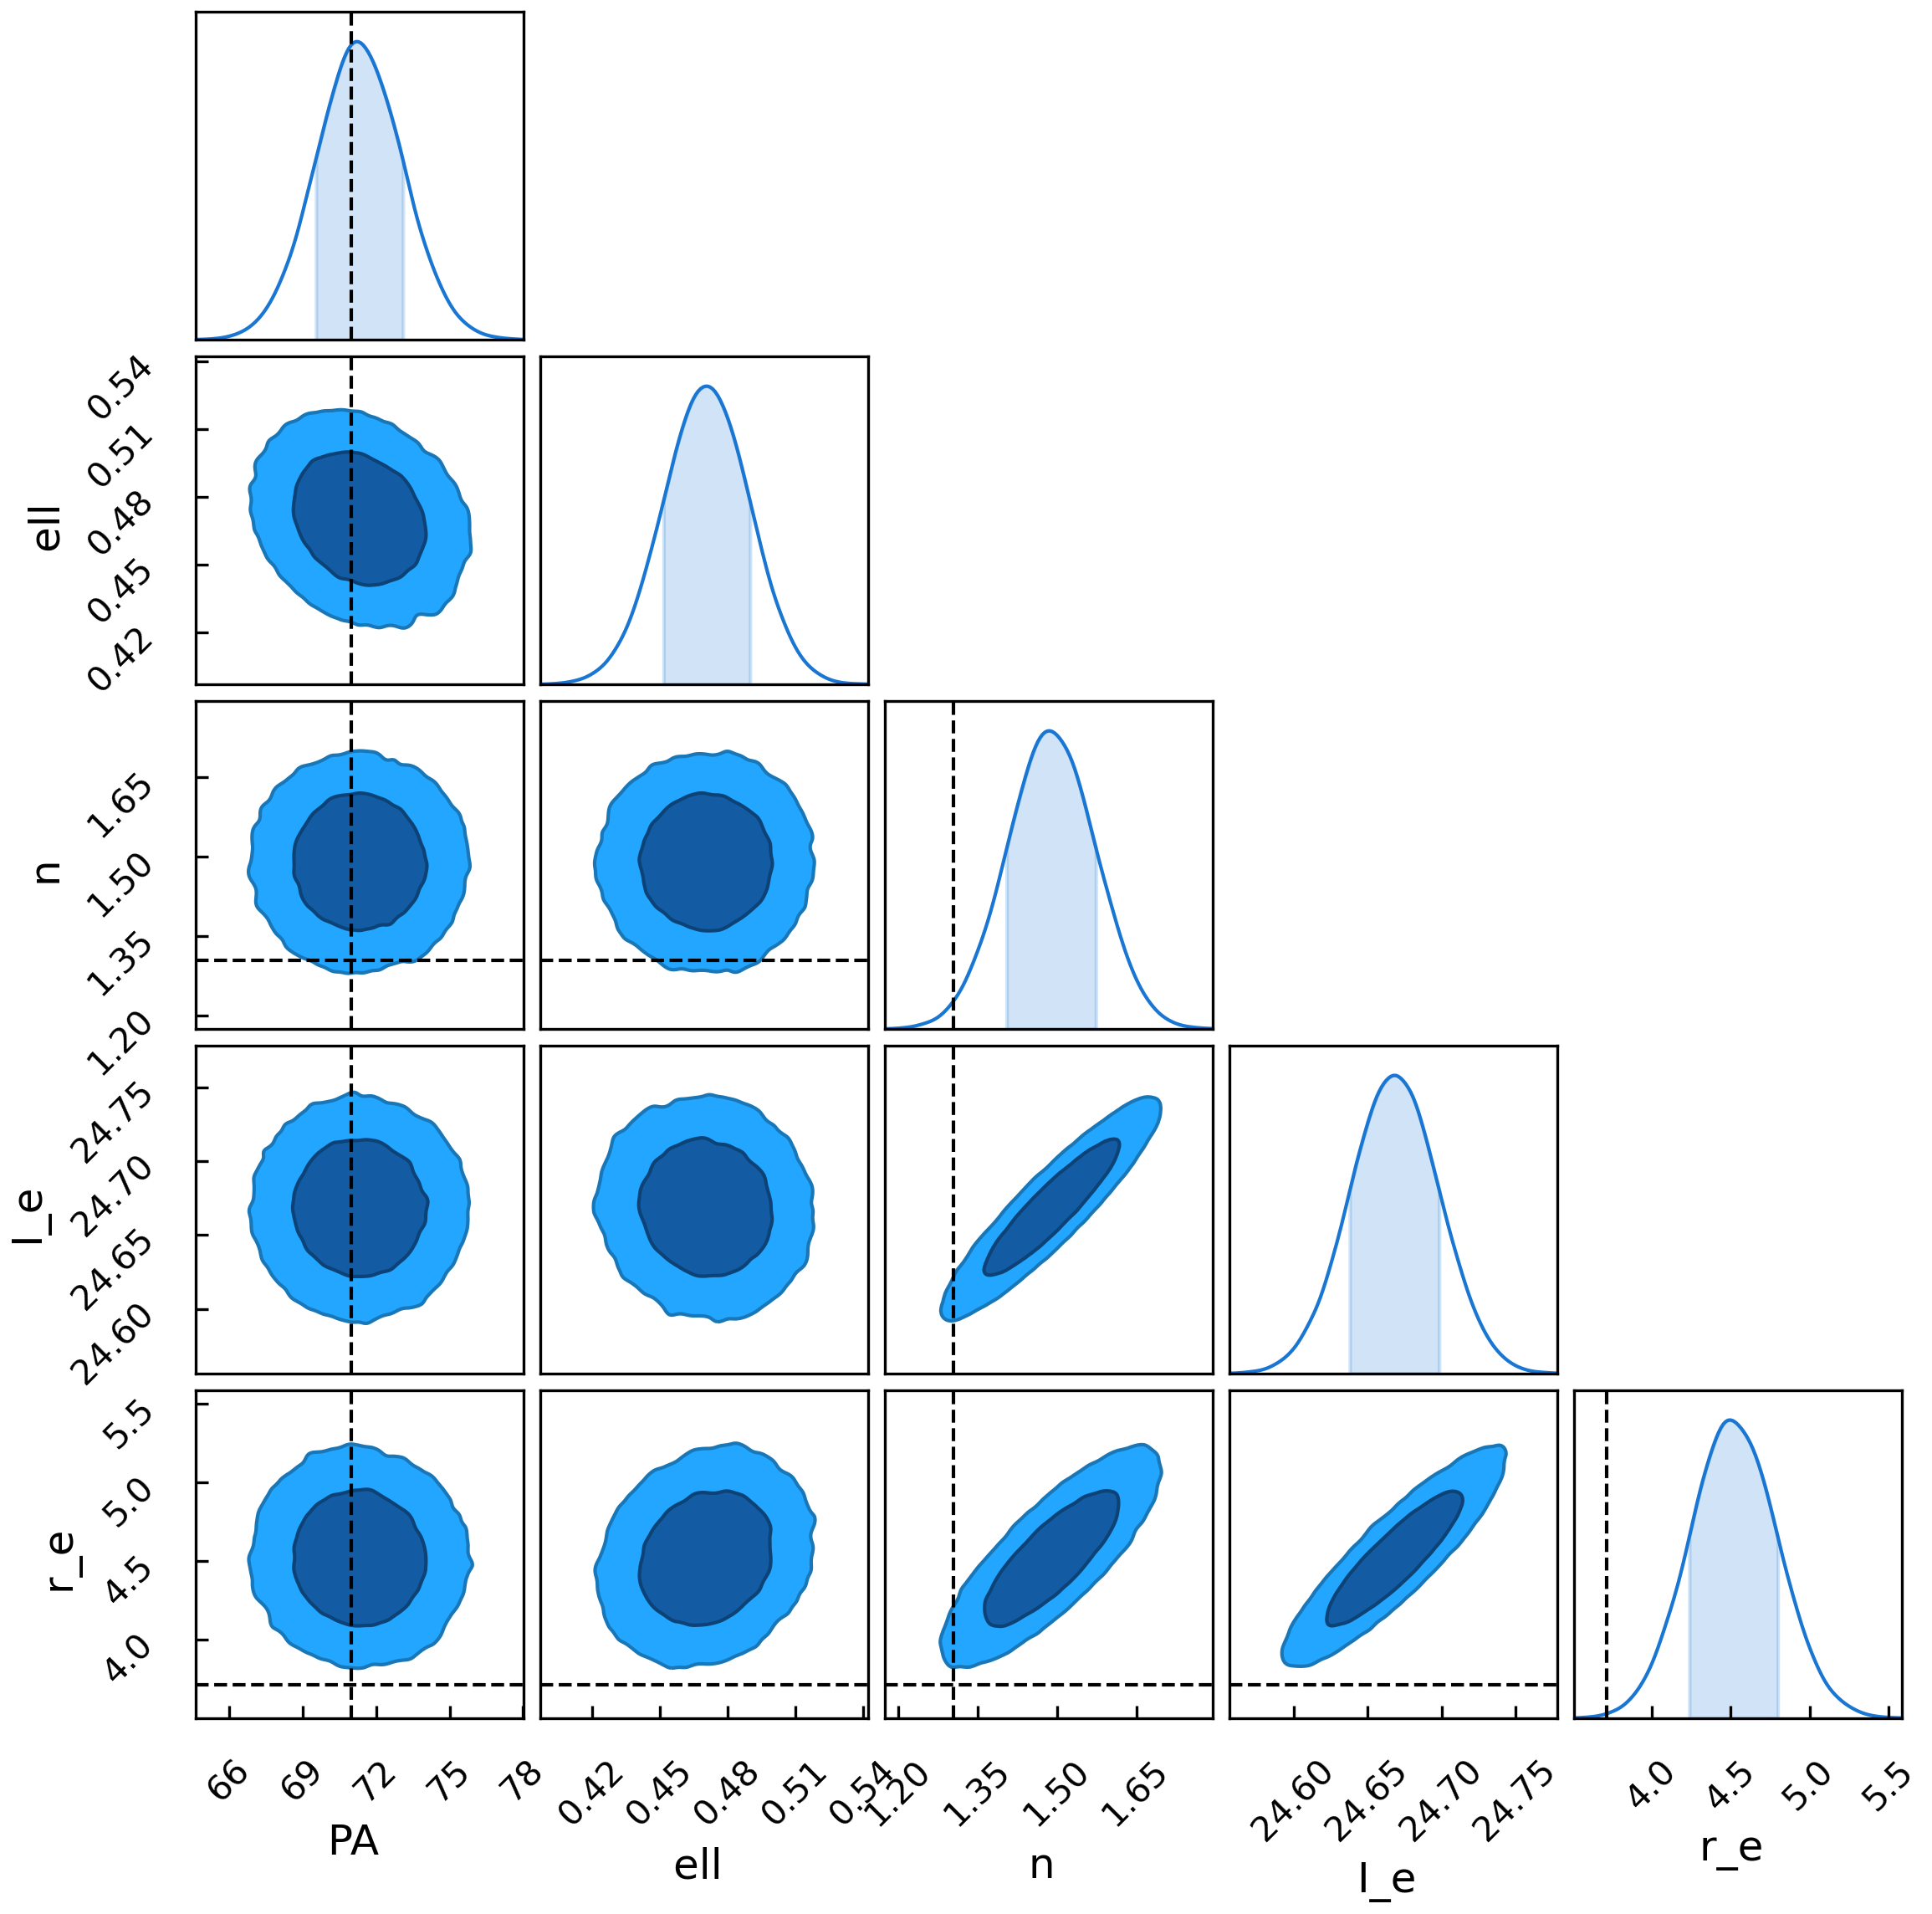

In [7]:
plot_one_chain(inverted_ood_on_original_samples, ood_on_original_y_keep, 'ood_ood', 100)
Image(filename='no_inference_plots/one_chain_ood_ood_100.png') 

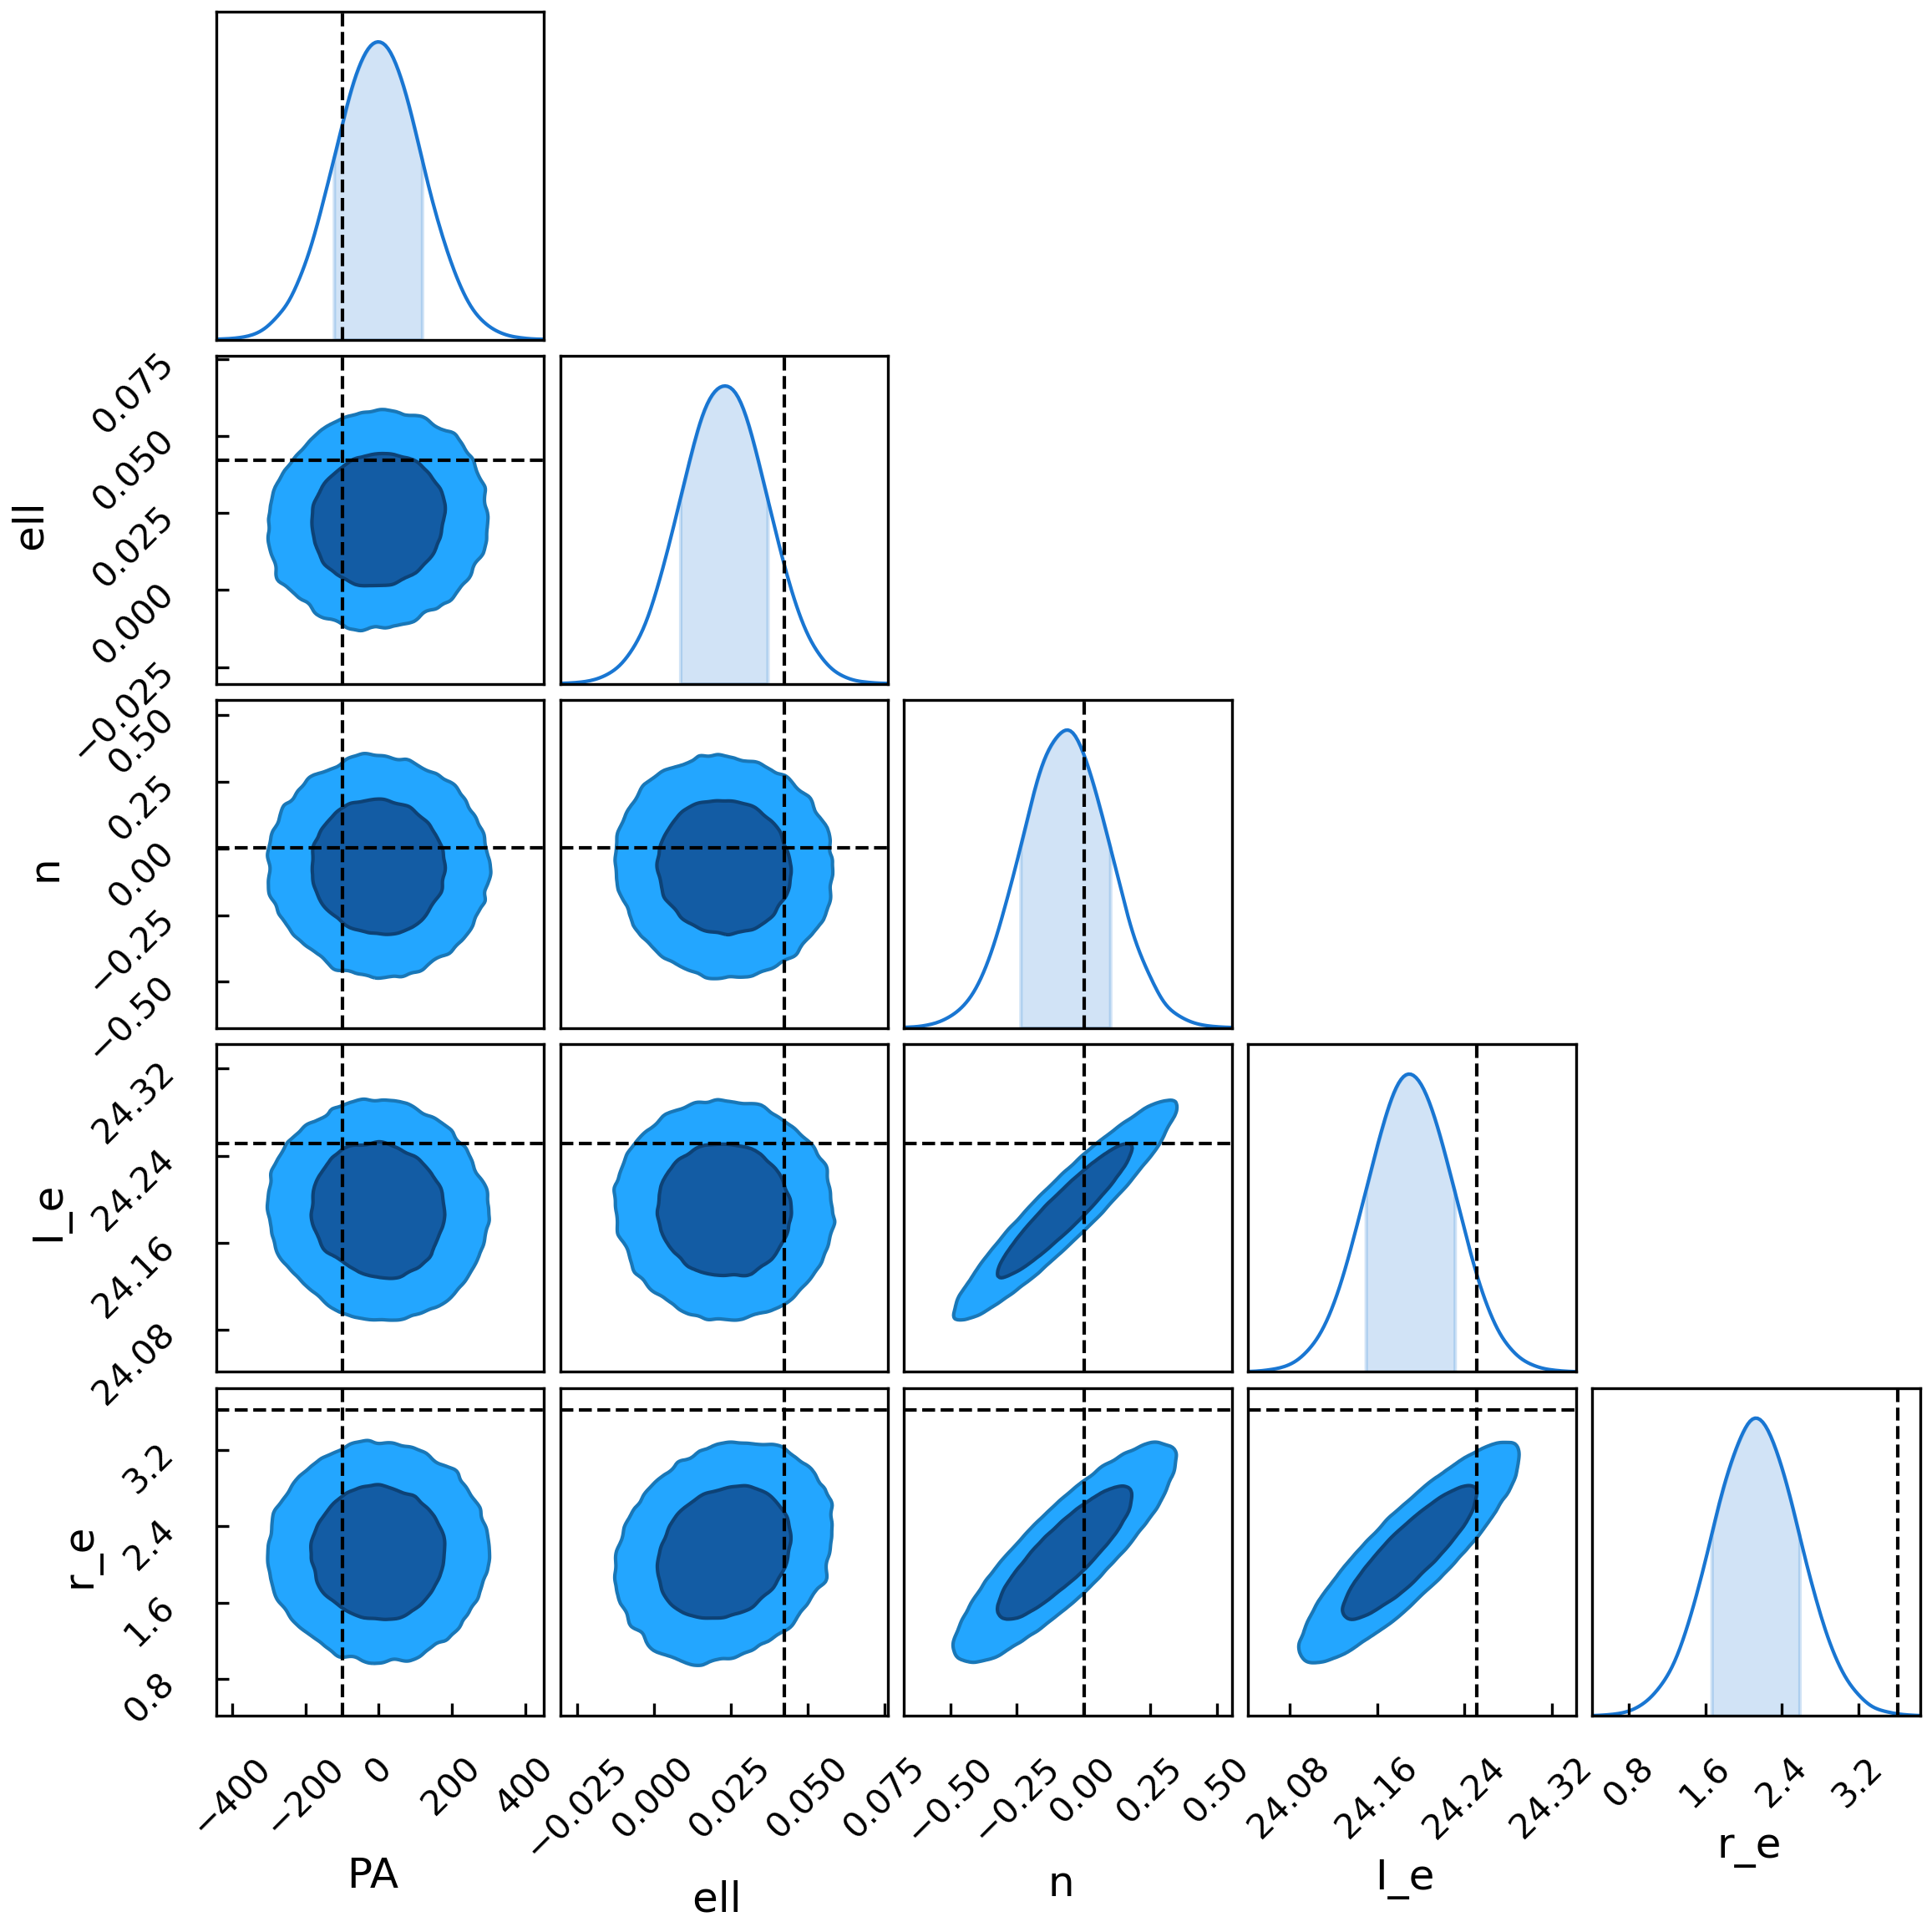

In [11]:
plot_one_chain(inverted_ood_on_gaussian, ood_on_gaussian_y_keep, 'ood_gaussian', 100)
Image(filename='no_inference_plots/one_chain_ood_gaussian_100.png') 